Work with the Pomegranate library and our similarity metric

In [31]:
from pomegranate import *
import numpy
import seaborn, time
from random import randrange

In [2]:
%pylab inline
%load_ext memory_profiler

Populating the interactive namespace from numpy and matplotlib


The following is adapted from the [Pomegranate docs](https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html):

In [3]:
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
monty = ConditionalProbabilityTable(
        [['A', 'A', 'A', 0.0],
         ['A', 'A', 'B', 0.5],
         ['A', 'A', 'C', 0.5],
         ['A', 'B', 'A', 0.0],
         ['A', 'B', 'B', 0.0],
         ['A', 'B', 'C', 1.0],
         ['A', 'C', 'A', 0.0],
         ['A', 'C', 'B', 1.0],
         ['A', 'C', 'C', 0.0],
         ['B', 'A', 'A', 0.0],
         ['B', 'A', 'B', 0.0],
         ['B', 'A', 'C', 1.0],
         ['B', 'B', 'A', 0.5],
         ['B', 'B', 'B', 0.0],
         ['B', 'B', 'C', 0.5],
         ['B', 'C', 'A', 1.0],
         ['B', 'C', 'B', 0.0],
         ['B', 'C', 'C', 0.0],
         ['C', 'A', 'A', 0.0],
         ['C', 'A', 'B', 1.0],
         ['C', 'A', 'C', 0.0],
         ['C', 'B', 'A', 1.0],
         ['C', 'B', 'B', 0.0],
         ['C', 'B', 'C', 0.0],
         ['C', 'C', 'A', 0.5],
         ['C', 'C', 'B', 0.5],
         ['C', 'C', 'C', 0.0]], [guest, prize])


In [35]:
s1 = Node(guest, name="guest")
s2 = Node(prize, name="prize")
s3 = Node(monty, name="monty")

model = BayesianNetwork("Monty Hall Problem")
model.add_states(s1, s2, s3)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.bake()

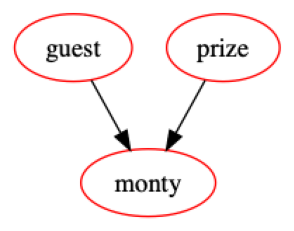

In [36]:
model.plot()

In [37]:
print(model.predict([['A', 'B', None],
                         ['A', 'C', None],
                         ['C', 'B', None]]))

[array(['A', 'B', 'C'], dtype=object), array(['A', 'C', 'B'], dtype=object), array(['C', 'B', 'A'], dtype=object)]


In [38]:
print(model.predict([['A', 'B', None],
                 ['A', None, 'C'],
                 [None, 'B', 'A']]))

[array(['A', 'B', 'C'], dtype=object), array(['A', 'B', 'C'], dtype=object), array(['C', 'B', 'A'], dtype=object)]


In [7]:
# model.plot()

In [8]:
# X = numpy.load('data.npy')
# model = BayesianNetwork.from_samples(X, algorithm='exact')

In [17]:
seaborn.set_style('whitegrid')

X = numpy.random.randint(2, size=(2000, 7))
X[:,3] = X[:,1]
X[:,6] = X[:,1]

X[:,0] = X[:,2]

X[:,4] = X[:,5]

[[1 1 1 ... 1 1 1]
 [0 1 1 ... 1 0 0]
 [1 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 0 1]
 [0 1 1 ... 1 0 0]]


In [18]:
X

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [10]:
model2 = BayesianNetwork.from_samples(X, algorithm='exact')

In [11]:
print(model2.structure)

((), (), (0,), (1,), (), (4,), (3,))


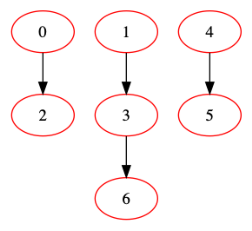

In [13]:
model2.plot()

In [111]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [112]:
def makeNodes(num_nodes):
    node_list = []
    prob_true = random.uniform(0, 1)
    distribution = DiscreteDistribution({True: prob_true, False: (1-prob_true)})
    for i in range(num_nodes):
        new_node = Node(distribution, name=alphabet[i])
        node_list.append(new_node)
    return node_list

In [113]:
def addNodes(model, num_nodes, edges_index):
    node_list = makeNodes(num_nodes)
    for i in range(num_nodes):
        model.add_state(node_list[i])
    for i in range(len(edges_index)):
        model.add_edge(node_list[edges_index[i][0]], node_list[edges_index[i][1]])        
    return model

In [114]:
def makeEdgesIndex(num_nodes, num_edges):
    edges_index = []
    for i in range(num_edges):
        first_edge = randrange(num_nodes)
        second_edge = randrange(num_nodes)
        
        while(second_edge == first_edge):
            second_edge = randrange(num_nodes)
            
        edges_index.append((first_edge, second_edge))
    return edges_index

In [115]:
def makeModel(num_nodes, num_edges):
    model = BayesianNetwork()
    edges_index = makeEdgesIndex(num_nodes, num_edges)
    model = addNodes(model, num_nodes, edges_index)
    return model

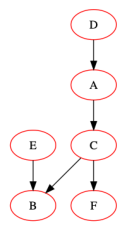

In [121]:
new_mod = makeModel(6, 5)
new_mod.plot()

In [124]:
new_mod.bake()

In [125]:
new_mod.predict_proba({})

array([{
    "class" :"Distribution",
    "dtype" :"bool",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.00864488617227728,
            "False" :0.9913551138277227
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"bool",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.08540689568054136,
            "False" :0.9145931043194587
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"bool",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.0008136573115430346,
            "False" :0.999186342688457
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"bool",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.00864488617227728,
            "False" :0.9913551138277227
        }
    ],
    "frozen" :false
},
       {
    "c

In [126]:
new_mod.marginal()

array([{
    "class" :"Distribution",
    "dtype" :"bool",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.00864488617227728,
            "False" :0.9913551138277227
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"bool",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.08540689568054136,
            "False" :0.9145931043194587
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"bool",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.0008136573115430346,
            "False" :0.999186342688457
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"bool",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.00864488617227728,
            "False" :0.9913551138277227
        }
    ],
    "frozen" :false
},
       {
    "c